In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")


  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [ ]:
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")

In [3]:
using Distributions, Plots

In [ ]:
# for now, manually extract, mu, sigma
mle = [0.3011294959350269, 0.4521741218077887]
cov = [0.000105457  3.47582e-5; 3.47582e-5   0.000287127]
posterior = MvNormal(mle, cov)

FullNormal(
dim: 2
μ: [0.3011294959350269, 0.4521741218077887]
Σ: [0.000105457 3.47582e-5; 3.47582e-5 0.000287127]
)


In [145]:
"""
    plot_gaussian(mle::Vector, cov::Matrix)

Visualizes a bivariate Gaussian distribution given its mean (MLE) and covariance.

# Arguments
- `mle::Vector`: A 2-element vector `[a_mean, m_mean]` representing the mean (maximum likelihood estimate) of the distribution.
- `cov::Matrix`: A 2×2 covariance matrix of the Gaussian.

# Returns
- `heatmap_plot`: A 2D heatmap of the probability density function over a grid centered around the MLE, with the MLE marked.
- `surface_plot`: A combined 3D surface plot from two different viewpoints, also showing the MLE as a point.
"""
function plot_gaussian(mle::Vector, cov::Matrix)

    # plotting ranges
    d = max(3*sqrt(cov[1,1]),3*sqrt(cov[2,2])) # make axes comparable
    a = range(mle[1]-d, mle[1]+d, length=500)
    m = range(mle[2]-d, mle[2]+d, length=500)
    pdf_evals = [pdf(posterior, [ai, mi]) for mi in m, ai in a]

    # create heatmap
    heatmap_plot = heatmap(a,m,pdf_evals, xlabel="a", ylabel="m")
    scatter!([mle[1]], [mle[2]], markersize=3, color=:"#0065bd", label="MLE")

    # create 3D plots from different viewpoints
    v1 = plot(a, m, pdf_evals, st=:surface, xlabel="a", ylabel="m", colorbar=false)
    scatter!([mle[1]], [mle[2]], [0], markersize=5, color=:"#0065bd", label="MLE")
    v2 = plot(m, a, pdf_evals', st=:surface, xlabel="m", ylabel="a", colorbar=false)
    scatter!([mle[2]], [mle[1]], [0], markersize=5, color=:"#0065bd", label="")
    surface_plot = plot(v1,v2, layout=(1,2), size=(800,400))

    return heatmap_plot, surface_plot
end

plot_gaussian

In [148]:
p1, p2 = plot_gaussian(mle, cov)

(Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=4})

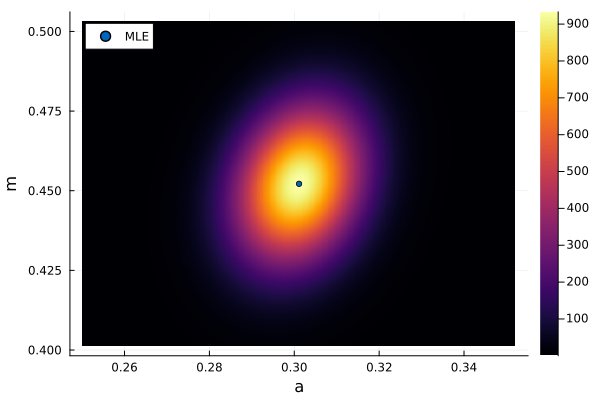

In [142]:
p1

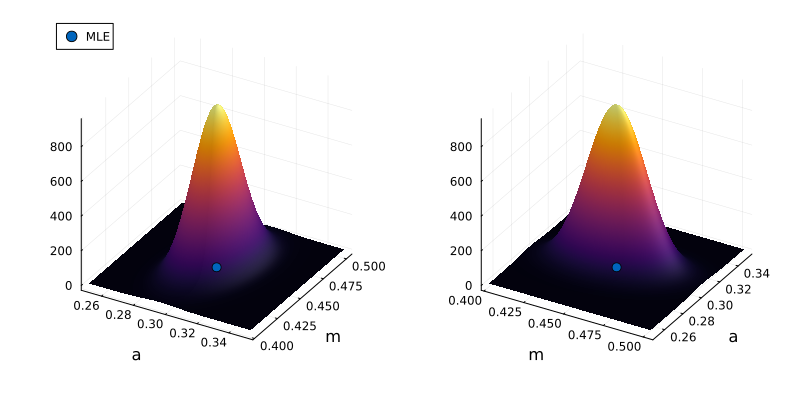

In [143]:
p2